# Visualization DocVQA

In [20]:
from datasets import load_dataset

data_path = "/APP/florence-2/data/DocumentVQA"
data = load_dataset(data_path)

Load pre-trained Florence-2 model

In [21]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] ="0" 
import torch
from transformers import AutoModelForCausalLM, AutoProcessor

CHECKPOINT = "/APP/florence-2/microsoft/Florence-2-base-ft"

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForCausalLM.from_pretrained(CHECKPOINT, trust_remote_code=True).to(DEVICE)
processor = AutoProcessor.from_pretrained(CHECKPOINT, trust_remote_code=True)

In [22]:
import supervision as sv
from PIL import Image

def run_inference(image: Image, task: str, text: str = ""):
    prompt = task + text
    
    if image.mode != "RGB":
        image = image.convert("RGB")
        
    inputs = processor(text=prompt, images=image, return_tensors="pt").to(DEVICE)
    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        num_beams=3
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    return processor.post_process_generation(generated_text, task=task, image_size=image.size)

{'DocVQA': 'unanswerable'}


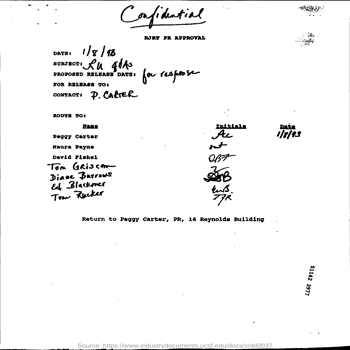

In [23]:
print(run_inference(task = "DocVQA", text = 'what subject in this form', image = data['train'][0]['image']))
display(data['train'][0]['image'].resize([350, 350]))

{'DocVQA': '11/18/18'}


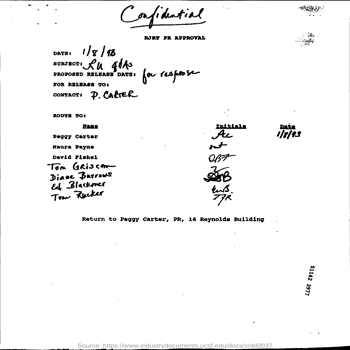

In [24]:
print(run_inference(task = "DocVQA", text = 'what proposed release date in this form', image = data['train'][0]['image']))
display(data['train'][0]['image'].resize([350, 350]))

{'DocVQA': 'unanswerable'}


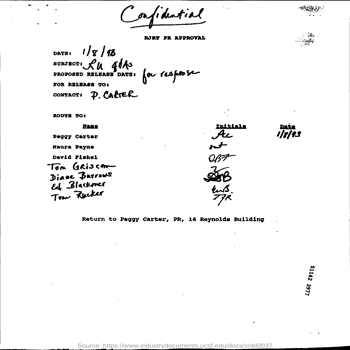

In [25]:
print(run_inference(task = "DocVQA", text = 'Return to where in in this form', image = data['train'][0]['image']))
display(data['train'][0]['image'].resize([350, 350]))

OCR_WITH_REGION

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


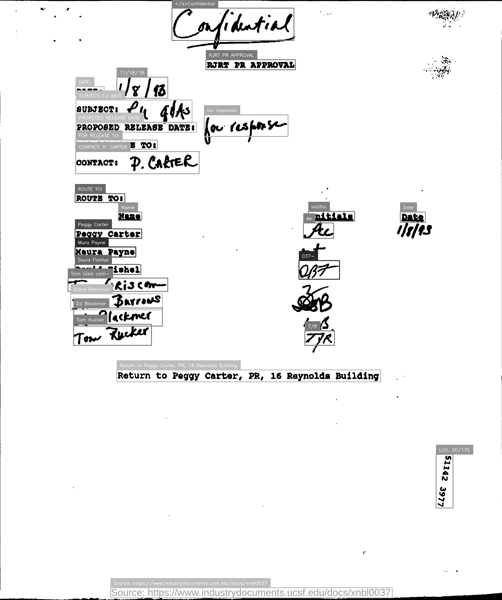

In [26]:
image = data['train'][0]['image']

task = "<OCR_WITH_REGION>"

response = run_inference(image=image, task=task)

detections = sv.Detections.from_lmm(sv.LMM.FLORENCE_2, response, resolution_wh=image.size)

bounding_box_annotator = sv.BoundingBoxAnnotator(color_lookup=sv.ColorLookup.INDEX)
label_annotator = sv.LabelAnnotator(color_lookup=sv.ColorLookup.INDEX)

image = bounding_box_annotator.annotate(image, detections)
image = label_annotator.annotate(image, detections)
image.thumbnail((600, 600))
image

Load finetuned Florence-2 model

In [27]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] ="0" 
import torch
from transformers import AutoModelForCausalLM, AutoProcessor

CHECKPOINT = "/APP/florence-2/task_qa/outputs_qa/qa_task_model_checkpoints/epoch_10"

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForCausalLM.from_pretrained(CHECKPOINT, trust_remote_code=True).to(DEVICE)
processor = AutoProcessor.from_pretrained(CHECKPOINT, trust_remote_code=True)

In [29]:
import supervision as sv
from PIL import Image

def run_inference(image: Image, task: str, text: str = ""):
    prompt = task + text
    
    if image.mode != "RGB":
        image = image.convert("RGB")
        
    inputs = processor(text=prompt, images=image, return_tensors="pt").to(DEVICE)
    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        num_beams=3
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    return processor.post_process_generation(generated_text, task=task, image_size=image.size)

{'<VQA>': 'ru gdas'}


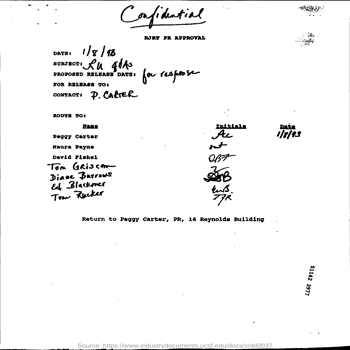

In [30]:
print(run_inference(task = "<VQA>", text = 'what subject in this form', image = data['train'][0]['image']))
display(data['train'][0]['image'].resize([350, 350]))

{'DocVQA': '1/8/13'}


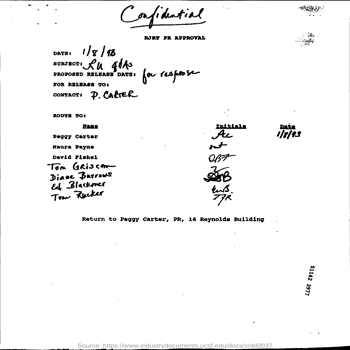

In [31]:
print(run_inference(task = "DocVQA", text = 'what proposed release date in this form', image = data['train'][0]['image']))
display(data['train'][0]['image'].resize([350, 350]))

{'DocVQA': 'P. Carter'}


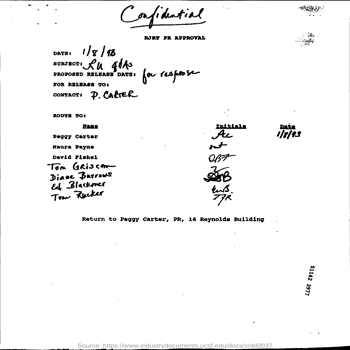

In [32]:
print(run_inference(task = "DocVQA", text = 'Return to where in in this form', image = data['train'][0]['image']))
display(data['train'][0]['image'].resize([350, 350]))